# Prática 3

***Aprendizado Dinâmico***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**

Considere as duas bases de dados a seguir

- Dados de fechamento do papel PETR4 de um período de março a julho de 2020 no arquivo PETR4.csv.

- Dados de casos confirmados para COVID-19 no estado de SP.


Nesta prática, aplicaremos os conhecimentos adquiridos na Aula 3 a esses dados, a saber:

- Função de autocorrelação

- Função de autocorrelação parcial

- Repetir a modelagem para os dados de PETR4 visto em aula.

- Para os dados de COVID-19: Um modelo ARIMA sazonal.

**1. Carregue as bibliotecas**

In [14]:
# Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # para determinar (p,q)


# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

**2. Faça a leitura dos dados de PETR4 em df1 e de COVID-19 no estado de SP em df2. Para os dados PETR4 usaremos a variável Close e para os dados de COVID-19 usaremos a variável confirmed. Complete as bases de dados usando reindex e fillna.**

In [15]:
#pkgdir = '/hdd/MBA/AprendizadoDinamico/Data'

# PETR4 - Leitura dos dados
df1 = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/PETR4.csv', index_col='Date', parse_dates=True)

idx1 = pd.date_range(start=df1.index.min(), end=df1.index.max(), freq='B')
df1 = df1.reindex(idx1)
df1.fillna(method='ffill', inplace=True)


# COVID-19 no estado de SP
df2 = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/covidSP.csv', index_col='date', parse_dates=True)

idx2 = pd.date_range(start=df2.index.min(), end=df2.index.max(), freq='D')
df2 = df2.reindex(idx2)
df2.fillna(0,inplace=True)


**3. Verifique graficamente se os dados foram lidos de forma correta.**

<Axes: >

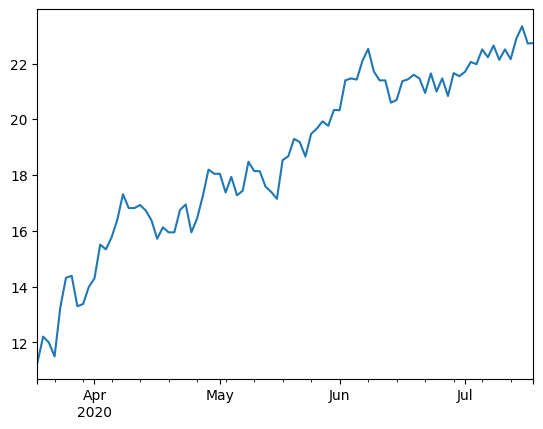

In [16]:
df1['Close'].plot()

<Axes: >

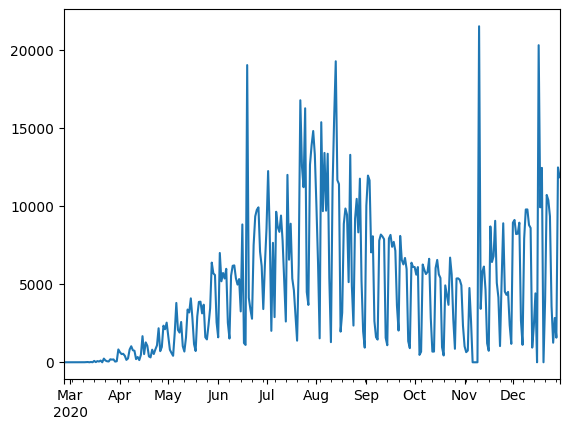

In [17]:
df2['confirmed'].plot()

**4. Obtenha os gráficos de autocorrelação e autocorrelação parcial para ambas as aplicações. Que características você observa nesses gráficos? Que modelo sugeriria com base nos correlogramas?**

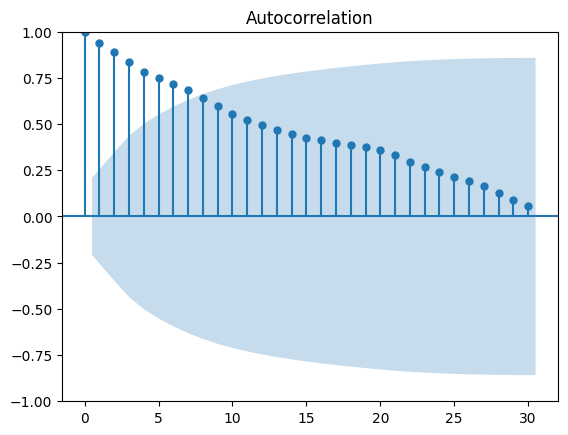

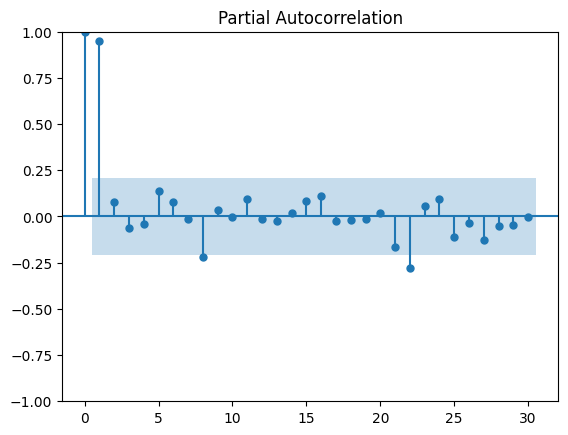

In [18]:
# Correlograma

plot_acf(df1['Close'], lags=30)
plot_pacf(df1['Close'], lags=30)
plt.show()

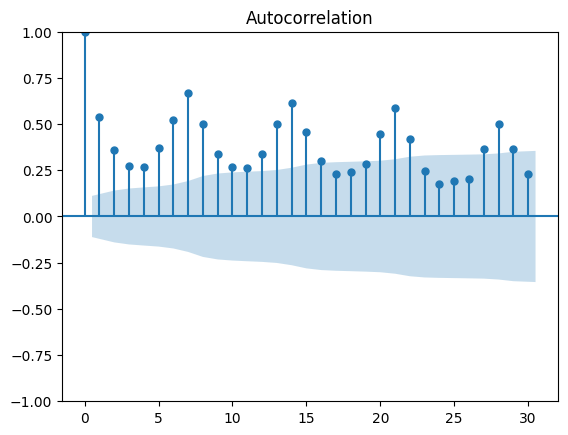

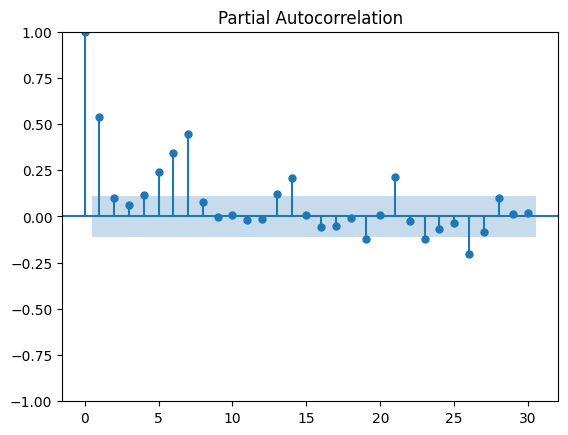

In [19]:

# Correlograma

plot_acf(df2['confirmed'], lags=30)
plot_pacf(df2['confirmed'], lags=30)
plt.show()

**5. Repita os gráficos de autocorrelação e autocorrelação parcial para a primeira diferença de cada aplicação. O que você pode concluir?**

In [20]:
df1.head(10)

,Open,High,Low,Close,Adj Close,Volume
2020-03-18,11.79,12.27,10.87,11.29,11.289389,162515200.0
2020-03-19,11.07,13.07,10.85,12.21,12.209339,157065200.0
2020-03-20,13.11,13.50,11.83,12.00,11.999351,149029900.0
2020-03-23,12.11,12.18,11.28,11.50,11.499378,107092400.0
2020-03-24,12.57,13.54,12.28,13.25,13.249283,114259200.0
2020-03-25,13.24,14.79,12.83,14.32,14.319224,158286200.0
2020-03-26,14.40,15.19,13.81,14.39,14.389221,130618400.0
2020-03-27,13.30,13.69,13.25,13.30,13.299280,101405900.0
2020-03-30,13.15,13.74,12.83,13.38,13.379276,110947200.0
2020-03-31,13.60,14.54,13.60,13.99,13.989244,156116500.0


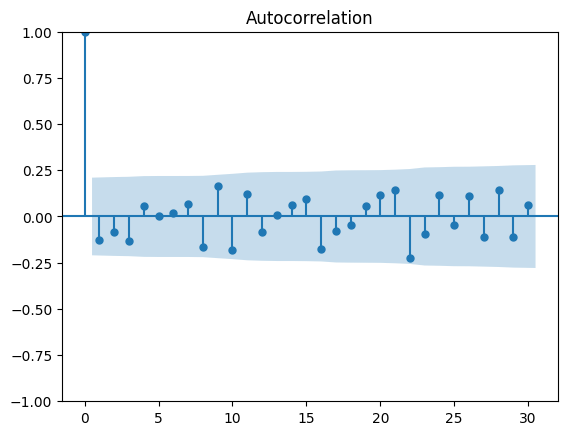

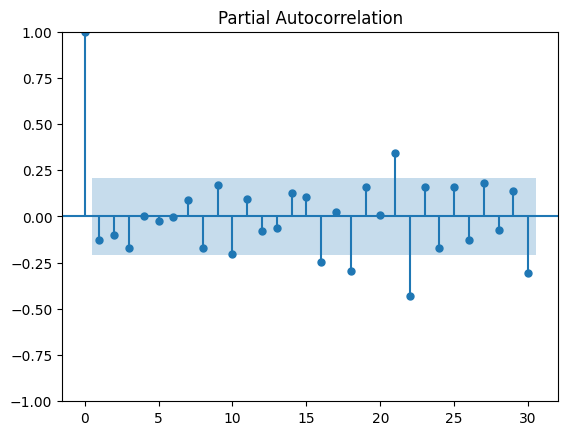

In [21]:
# Correlograma

plot_acf(np.diff(df1['Close']), lags=30)
plot_pacf(np.diff(df1['Close']), lags=30)
plt.show()

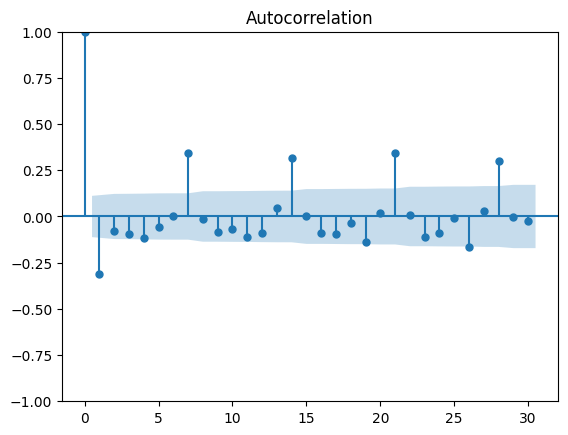

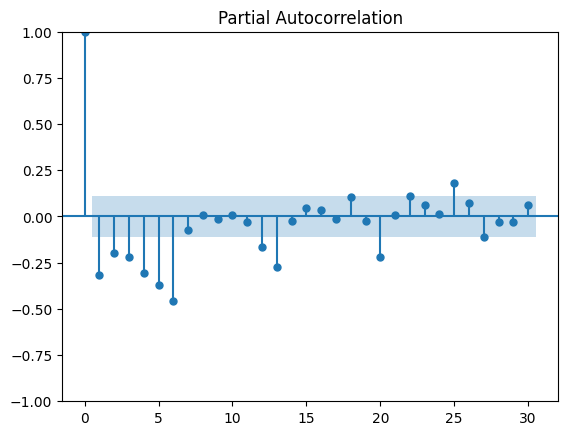

In [22]:
# Correlograma

plot_acf(np.diff(df2['confirmed']), lags=30)
plot_pacf(np.diff(df2['confirmed']), lags=30)
plt.show()

**6. Para os dados de PETR4, refaça a modelagem vista em aula.**

In [23]:
#Instale, se necessário, na versão sugerida
!pip install statsmodels==0.13.5

#Instale, se necessário, na versão sugerida
!pip install pmdarima==2.0.3

In [24]:
from pmdarima import auto_arima # Para determinar a ordem do ARIMA


In [25]:
stepwise_fit = auto_arima(df1['Close'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=0,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # se uma ordem não convergir, ignorar
                          suppress_warnings=True,  # ignorar avisos
                          stepwise=True)           # executar stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=152.390, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=153.013, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=152.598, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=154.944, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=152.746, Time=0.70 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.000 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   88
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -74.195
Date:                Mon, 22 Jul 2024   AIC                            152.390
Time:                        21:32:56   BIC                            157.322
Sample:                    03-18-2020   HQIC                           154.376
                         - 07-17-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1316      0.062      2.124      0.034       0.010       0.253
sigma2         0.3223      0.053      6.046      0.000       0.218       0.427
===================================================================================
Ljung-Box (L1) (Q):                   1.40   Jarque-Bera (JB):                 1.14
Prob(Q):                              0.24   Prob(JB):                         0.57
Heteroskedasticity (H):               0.57   Skew:                             0.25
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**7. Desafio: Ainda não vimos o modelo SARIMA, mas já sabemos que a série de COVID-19 tem sazonalidade. Como os dados de COVID-19 apresentam sazonalidade, vamos arriscar no tema da próxima aula? Altere seasonal para True e escolha o melhor modelo entre os SARIMA propostos. Discutiremos com detalhes este modelo na Aula 4.**

In [26]:
stepwise_fit = auto_arima(df2['confirmed'], start_p=0, start_q=0,
                          max_p=3, max_q=3, m=7,
                          seasonal=True,
                          d=None, trace=True,
                          error_action='ignore',   # se uma determinada ordem não convergir, ignorar
                          suppress_warnings=True,  # ignorar avisos
                          stepwise=True)           # executar stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=5922.655, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=6007.140, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5916.437, Time=0.91 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5845.769, Time=1.85 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=6005.169, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=5891.230, Time=0.66 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=5778.886, Time=3.81 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=5816.796, Time=3.03 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=5760.616, Time=5.76 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=5787.518, Time=4.94 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=5.88 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=5813.850, Time=2.00 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=5924.628, Time=1.62 sec
 ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=5772.417, Time=4.16 sec
 ARIMA(0,1,2)(2,0,1)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  309
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -2874.364
Date:                           Mon, 22 Jul 2024   AIC                           5756.727
Time:                                   21:34:08   BIC                           5771.648
Sample:                               02-26-2020   HQIC                          5762.693
                                    - 12-30-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9021      0.027    -33.593      0.000      -0.955      -0.849
ar.S.L7        0.9673      0.034     28.507      0.000       0.901       1.034
ma.S.L7       -0.7733      0.067    -11.459      0.000      -0.906      -0.641
sigma2      7.315e+06   2.74e+05     26.680      0.000    6.78e+06    7.85e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):              2203.69
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):              16.15   Skew:                             1.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""